In [1]:
import numpy as np
import pandas as pd
# from plotnine import *
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# Exploratory Data Analysis
Session Data (Non-Fleet)
## 2 Energy and Time

In [2]:
# do verbose sanity checks, and do not save in the end
test = False
# working on EC2 instance
cloud = True

In [3]:
if cloud:
    path = "../../data/"
    file = "sessions_clean.csv"
else:
    path = "/home/ourownstory/github/data/SLAC"
    file = "Charging_Session_SLAC.csv"
    
if test:
    nrows = 1e6
else:
    nrows = None
    
def get_csv():
    print("Reading {} rows of dataframe".format(nrows if nrows is not None else "ALL"))
    return pd.read_csv(path + file, index_col=False, nrows=nrows)#, low_memory=False)

In [4]:
df_raw = get_csv()
sessions = df_raw.copy(deep=True)

Reading ALL rows of dataframe


In [5]:
print(list(sessions))
# print(sessions.head(5))

['Session ID', 'Station ID', 'Port ID', 'Connector Type', 'POI Category', 'POI Subcategory', 'Session Time Zone', 'Session Time (secs)', 'Charging Time (secs)', 'Start SoC', 'End SoC', 'Full Charge', 'Energy (kWh)', 'Driver ID', 'Driver Zip', 'Vehicle Make', 'Vehicle Model', 'Battery Capacity', 'EV Type', '$ Fee', 'Fee Currency', 'Zip Code', 'City', 'County', 'State', 'Country', 'Driver City', 'Driver State', 'Driver Country', 'Max Power', 'Session Type', 'Vehicle Model Year', 'start_datetime', 'start_seconds', 'start_year', 'start_month', 'start_day', 'start_weekday']


## Time
### Session / Charging Total

In [8]:
column = "Session Time Zone"
print(sessions[column].value_counts())
# print(len(sessions[column].unique()))

PDT    8406397
PST    3380448
Name: Session Time Zone, dtype: int64


15.943333333333333


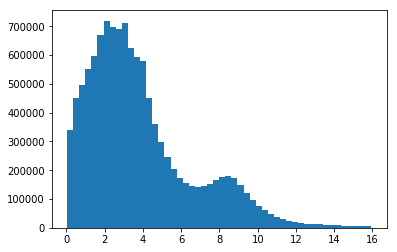

In [19]:
col = "Session Time (secs)"
df = sessions[col]
p_99 = np.percentile(df, 99)
print(p_99/(60*60))
df = df[df<p_99]
plot = plt.hist(df/(60*60), bins=50)
# plot = plt.hist(np.log(df/(60*60)), bins=100)
plt.savefig("plots/Session_Duration.png")

7.882777777777778


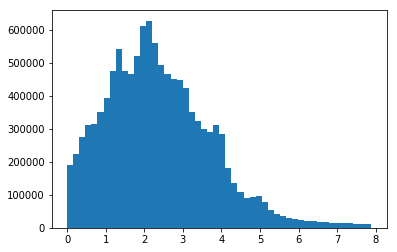

In [20]:
col = "Charging Time (secs)"
df = sessions[col]
p_99 = np.percentile(df, 99)
print(p_99/(60*60))
df = df[df<p_99]
plot = plt.hist(df/(60*60), bins=50)
plt.savefig("plots/Session_Charging_Time.png")

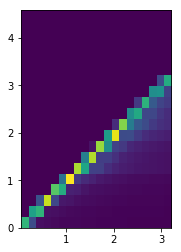

In [17]:
# plot: lower half of session times
col1 = "Session Time (secs)"
col2 = "Charging Time (secs)"
df = sessions.copy(deep=True)
p1 = np.percentile(df[col1], 50)
p2 = np.percentile(df[col2], 95)
df = df[df[col1] < p1]
df = df[df[col2] < p2]
x = df[col1] /60 /60
y = df[col2] /60 /60

heatmap, xedges, yedges = np.histogram2d(x, y, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plot = plt.imshow(heatmap.T, extent=extent, origin='lower')

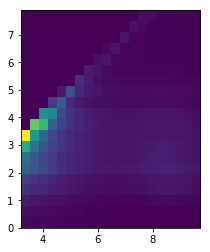

In [22]:
# plot: upper half of session times
col1 = "Session Time (secs)"
col2 = "Charging Time (secs)"
df = sessions.copy(deep=True)

p1 = np.percentile(df[col1], 50)
p1u = np.percentile(df[col1], 95)
p2 = np.percentile(df[col2], 99)

df = df[df[col1] > p1]
df = df[df[col1] < p1u]
df = df[df[col2] < p2]
x = df[col1] /60 /60
y = df[col2] /60 /60

heatmap, xedges, yedges = np.histogram2d(x, y, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plot = plt.imshow(heatmap.T, extent=extent, origin='lower')

### Notes
mostly charging ends when the session ends. But if Session lasts longer than 2 hours, many charging mostly will end after 2-4 hours. 

## Start / End Times (PDT)

In [13]:
# note: transformed in EDA notebook 0

# # handle datetimes: START
# col = "Station Start Time (Local)"

# if test:
#     df = sessions[col]
#     print(df[0])
#     print(datetime.strptime(df[0], "%Y-%m-%d %H:%M:%S.%f"))

# def to_datetime(x):
#     return datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")

# def to_seconds(x):
#     return 60*60*x.hour + 60*x.minute + x.second

# sessions["start_datetime"] = sessions[col].apply(to_datetime)
# sessions["start_time_seconds"] = sessions["start_datetime"].apply(to_seconds)

# if test:
#     print(sessions["start_datetime"].head(5))
#     print(sessions["start_time_seconds"].head(5))

2017-09-21 13:50:12.0
2017-09-21 13:50:12
0   2017-09-21 13:50:12
1   2017-09-21 13:15:01
2   2017-09-21 13:50:13
3   2017-09-21 13:50:11
4   2017-09-21 13:50:14
Name: start_datetime, dtype: datetime64[ns]
0    49812
1    47701
2    49813
3    49811
4    49814
Name: start_time_seconds, dtype: int64


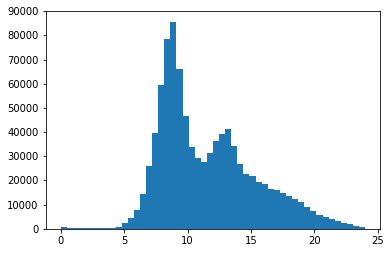

In [14]:
# plot START

df = sessions["start_time_seconds"]
plot = plt.hist(df/(60*60), bins=50)

In [15]:
# note: transformed in EDA notebook 0

# # handle datetimes: END
# col = "Station End Time (Local)"

# if test:
#     df = sessions[col]
#     print(df[0])
#     print(datetime.strptime(df[0], "%Y-%m-%d %H:%M:%S.%f"))

# def to_datetime(x):
#     return datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")

# def to_seconds(x):
#     return 60*60*x.hour + 60*x.minute + x.second

# sessions["end_datetime"] = sessions[col].apply(to_datetime)
# sessions["end_time_seconds"] = sessions["end_datetime"].apply(to_seconds)

# if test:
#     print(sessions["end_datetime"].head(5))
#     print(sessions["end_time_seconds"].head(5))

2017-09-21 14:59:12.0
2017-09-21 14:59:12
0   2017-09-21 14:59:12
1   2017-09-21 17:10:05
2   2017-09-21 15:02:57
3   2017-09-21 16:33:49
4   2017-09-21 15:49:40
Name: end_datetime, dtype: datetime64[ns]
0    53952
1    61805
2    54177
3    59629
4    56980
Name: end_time_seconds, dtype: int64


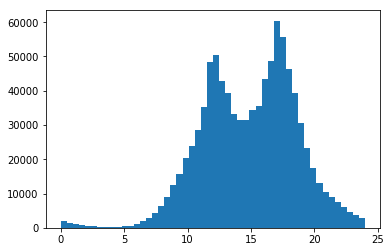

In [16]:
# plot END

df = sessions["end_time_seconds"]
plot = plt.hist(df/(60*60), bins=50)

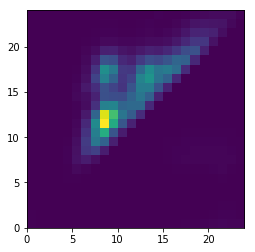

In [35]:
# plot start-end
x = sessions["start_seconds"] 
y = (x + sessions["Session Time (secs)"]) %(24*3600)
x = x /60  /60
y = y /60  /60

heatmap, xedges, yedges = np.histogram2d(x, y, bins=24)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plot = plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.savefig("plots/Start_End_Time.png")

In [18]:
# alternative plot

# import seaborn as sns
# ax = sns.heatmap(heatmap)
# plt.show()

### Notes
The main arrival peak is at 0800. The second arrival peak is at 1300.
The main departure peak is at 1800. The second departure peak is at 1200
Most people who arrive at 0800/0900 will leave around 1200, but some remain until 1700.
Many people that arrive at 1300 will leave at 1600/1700.
People who arive between 1600 and 2400 will leave within 1-3 hours.

Among the cars which remain parked over lunch, there is a large pot
ential for load-shifting. Similarly, people, who only leave for lunch, but immediately come back, they might be fine if their car is not full
y cahrged before they actually leave their workplace in the evening.


## Energy


43.62962228000003


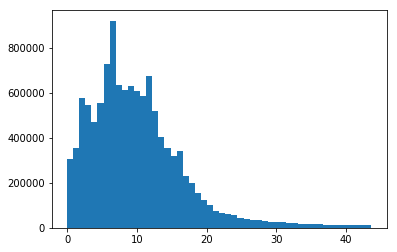

In [37]:
col = "Energy (kWh)"
df = sessions[col]
p_99 = np.percentile(df, 99)
print(p_99)
df = df[df<p_99]
plot = plt.hist(df, bins=50)

7.76
29.828957649999992


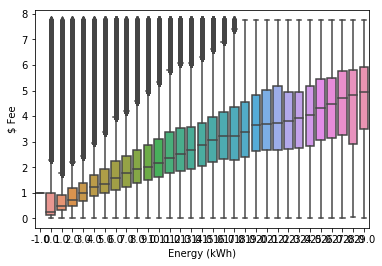

In [39]:
col1 = "Energy (kWh)"
col2 = "$ Fee"

df = sessions.copy(deep=True)
p_99 = np.nanpercentile(df[col2], 99)
print(p_99)
df = df[df[col2] < p_99]
df = df[df[col2] > 0.01]
p_99 = np.nanpercentile(df[col1], 99)
print(p_99)
df = df[df[col1] < p_99]

x = df[col1] //1
y = df[col2]
sns.boxplot(x,y)

In [40]:
df = sessions.copy(deep=True)
df = df[df["$ Fee"] == 0]
print(len(df[df["$ Fee"] == 0]))

df = df[df["Energy (kWh)"] > 10]
print(df["POI Category"].value_counts().head(10))

df = df[df["POI Category"] != "Workplace"]
print(df["Vehicle Make"].value_counts().head(10))
print(df["City"].value_counts().head(10))

8588906
Workplace                  3303013
Municipal                   194607
Parking                     106766
Retail                       60779
Education                    58362
Healthcare                   56296
Multifamily Commercial       27760
Hospitality                  18330
Fleet                         9686
Government (Fed, State)       9111
Name: POI Category, dtype: int64
Chevrolet        131909
Nissan            98477
Tesla             87135
BMW               46236
Volkswagen        36721
Fiat              36487
Ford              16642
Toyota             9642
Honda              8283
Mercedes-Benz      8132
Name: Vehicle Make, dtype: int64
San Francisco    99364
Palo Alto        38549
Santa Clara      37201
San Jose         31847
Oakland          27951
Walnut Creek     25697
Mountain View    22942
Hayward          20700
Menlo Park       16475
Redwood City     15734
Name: City, dtype: int64


## Session/Charging Time vs Start / End Times (PDT)

15.943333333333333


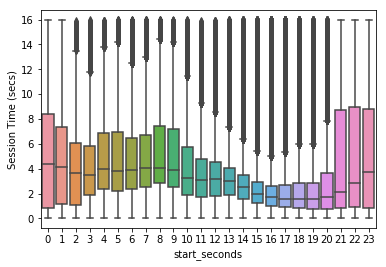

In [41]:
col1 = "start_seconds"
col2 = "Session Time (secs)"

df = sessions.copy(deep=True)
p_99 = np.nanpercentile(df[col2], 99)
print(p_99/3600)
df = df[df[col2] < p_99]

x = df[col1] //3600
y = df[col2] /3600
sns.boxplot(x,y)

7.882777777777778


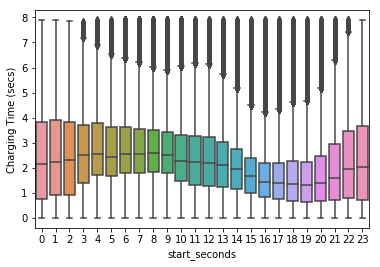

In [42]:
col1 = "start_seconds"
col2 = "Charging Time (secs)"

df = sessions.copy(deep=True)
p_99 = np.nanpercentile(df[col2], 99)
print(p_99/3600)
df = df[df[col2] < p_99]

x = df[col1] //3600
y = df[col2] /3600
sns.boxplot(x,y)

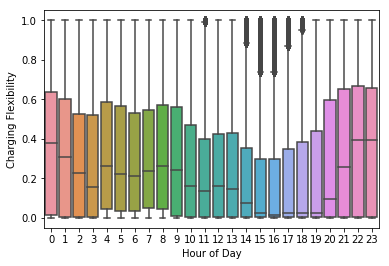

In [51]:
# ratio of charge time vs session time per hour

col1 = "start_seconds"
col2 = "Charging Time (secs)"
col3 = "Session Time (secs)"

df = sessions.copy(deep=True)
# p_99 = np.nanpercentile(df[col3], 99)
# print(p_99/3600)
# df = df[df[col3] < p_99]

df = df[(df[col3] - df[col2]) >= 0]
df = df[df[col3] > 3600]

x = df[col1] //3600
y = 1 - df[col2] / df[col3]
ax = sns.boxplot(x,y)
ax.set(xlabel='Hour of Day', ylabel='Charging Flexibility')
plt.savefig("plots/Charging_Flexibility.png")

9.694722222222222


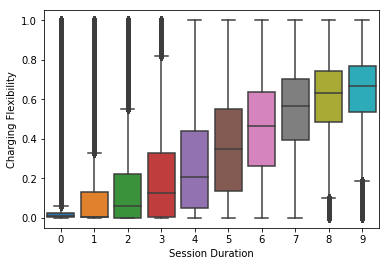

In [56]:
# ratio of charge time vs session duration

col1 = "Session Time (secs)"
col2 = "Charging Time (secs)"
col3 = "Session Time (secs)"

df = sessions.copy(deep=True)
p_99 = np.nanpercentile(df[col1], 95)
print(p_99/3600)
df = df[df[col3] < p_99]

df = df[(df[col3] - df[col2]) >= 0]
# df = df[df[col3] > 3600]

x = df[col1] //3600
y = 1 - df[col2] / df[col3]
ax = sns.boxplot(x,y)
ax.set(xlabel='Session Duration', ylabel='Charging Flexibility')
plt.savefig("plots/Charging_Flexibility_Duration.png")

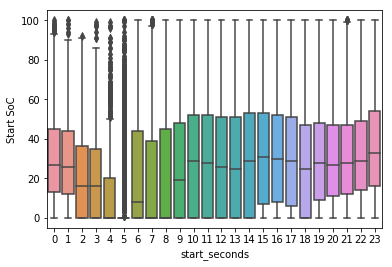

In [57]:
col1 = "start_seconds"
col2 = "Start SoC"

df = sessions.copy(deep=True)
# p_99 = np.nanpercentile(df[col2], 99)
# print(p_99/3600)
# df = df[df[col2] < p_99]

x = df[col1] //3600
y = df[col2]
sns.boxplot(x,y)

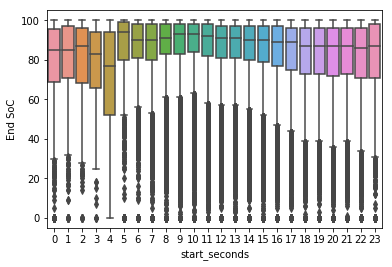

In [58]:
col1 = "start_seconds"
col2 = "End SoC"

df = sessions.copy(deep=True)
# p_99 = np.percentile(df[col2], 99)
# print(p_99/3600)
# df = df[df[col2] < p_99]

x = df[col1] //3600
y = df[col2]
sns.boxplot(x,y)

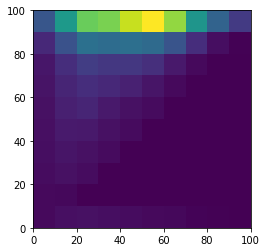

In [63]:
# plot start-end SOC
df = sessions.copy(deep=True)
df = df[~df["Start SoC"].isnull()]
df = df[~df["End SoC"].isnull()]
x = df["Start SoC"] 
y = df["End SoC"] 

heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plot = plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.savefig("plots/Start_End_SoC.png")